# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1330]:
# Import your libraries:

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_regression
import sklearn

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")


# Model & split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [1331]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [1332]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [1333]:

numeric_df = websites.select_dtypes(include=[np.number])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CONTENT_LENGTH             969 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 4   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 5   REMOTE_IPS                 1781 non-null   int64  
 6   APP_BYTES                  1781 non-null   int64  
 7   SOURCE_APP_PACKETS         1781 non-null   int64  
 8   REMOTE_APP_PACKETS         1781 non-null   int64  
 9   SOURCE_APP_BYTES           1781 non-null   int64  
 10  REMOTE_APP_BYTES           1781 non-null   int64  
 11  APP_PACKETS                1781 non-null   int64  
 12  DNS_QUERY_TIMES            1780 non-null   float64
 13  Type                       1781 non-null   int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [1334]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


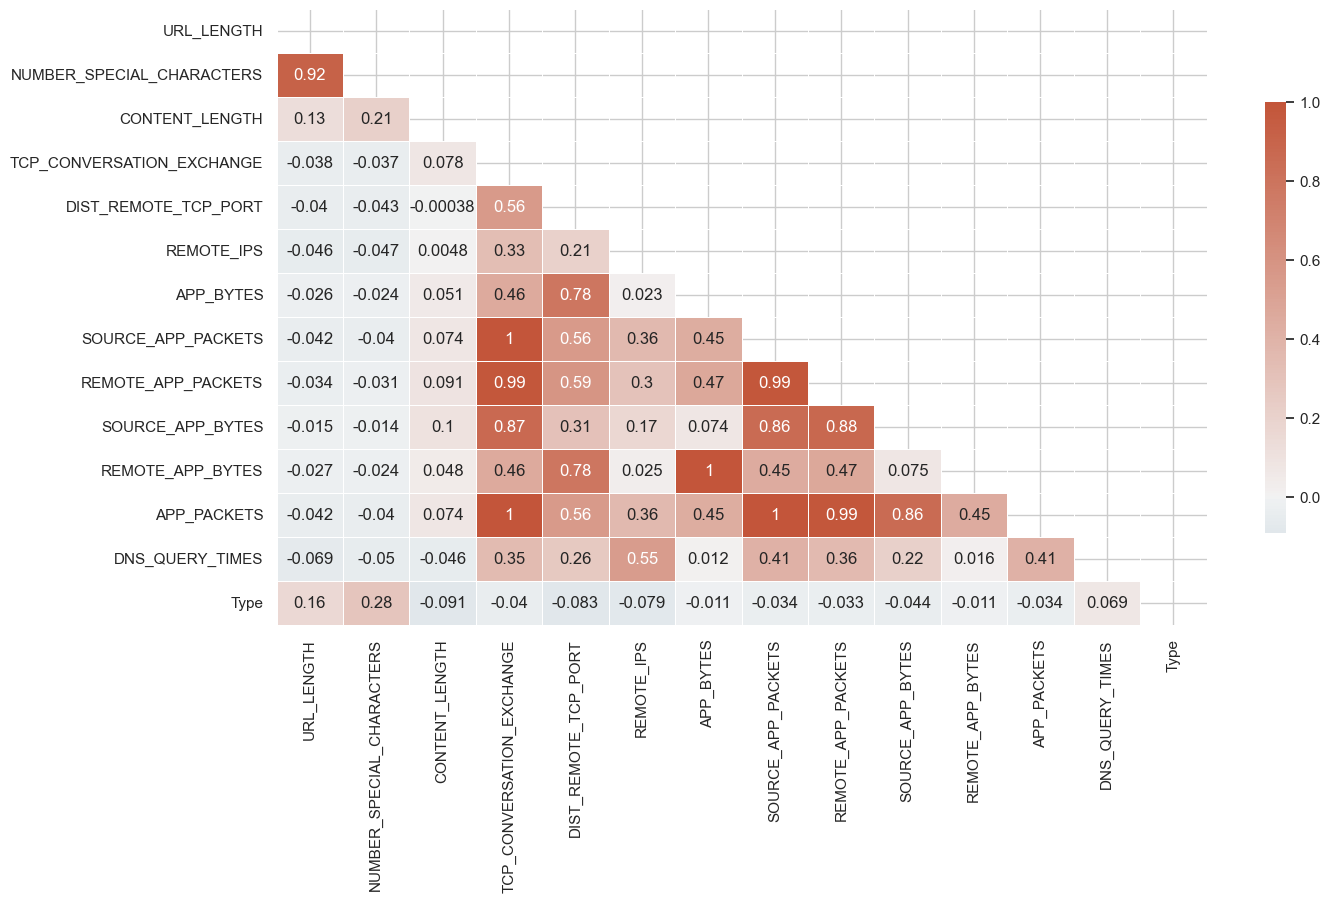

In [1335]:
def chart_heatmap(corr):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=False, linewidths=.5, annot=True,cbar_kws={"shrink": .7})
    plt.show();

chart_heatmap(correlation_matrix)

<div class="alert alert-success">
<li><b>Strong Correlations:</b> There are several variables with strong positive correlations with each other, as indicated by the darker cells. </li>
<li>APP_BYTES seems to have a strong positive correlation with SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES, REMOTE_APP_BYTES, and APP_PACKETS.</li>
<li>Variables related with traffic/conversation are highly correlated.</li>
</div>

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [1336]:
numeric_df_mod = numeric_df
numeric_df_mod = numeric_df_mod.drop(columns=["TCP_CONVERSATION_EXCHANGE","APP_PACKETS","APP_BYTES","SOURCE_APP_PACKETS","NUMBER_SPECIAL_CHARACTERS"])
correlation_matrix = numeric_df_mod.corr()


<div class="alert alert-success">
<li>Columns with high correlation have been removed (>90%) </li>
<li>Many of them are related to traffic data and they shouldn`t be significant to predict if a website is malicious or not</li>
</div>

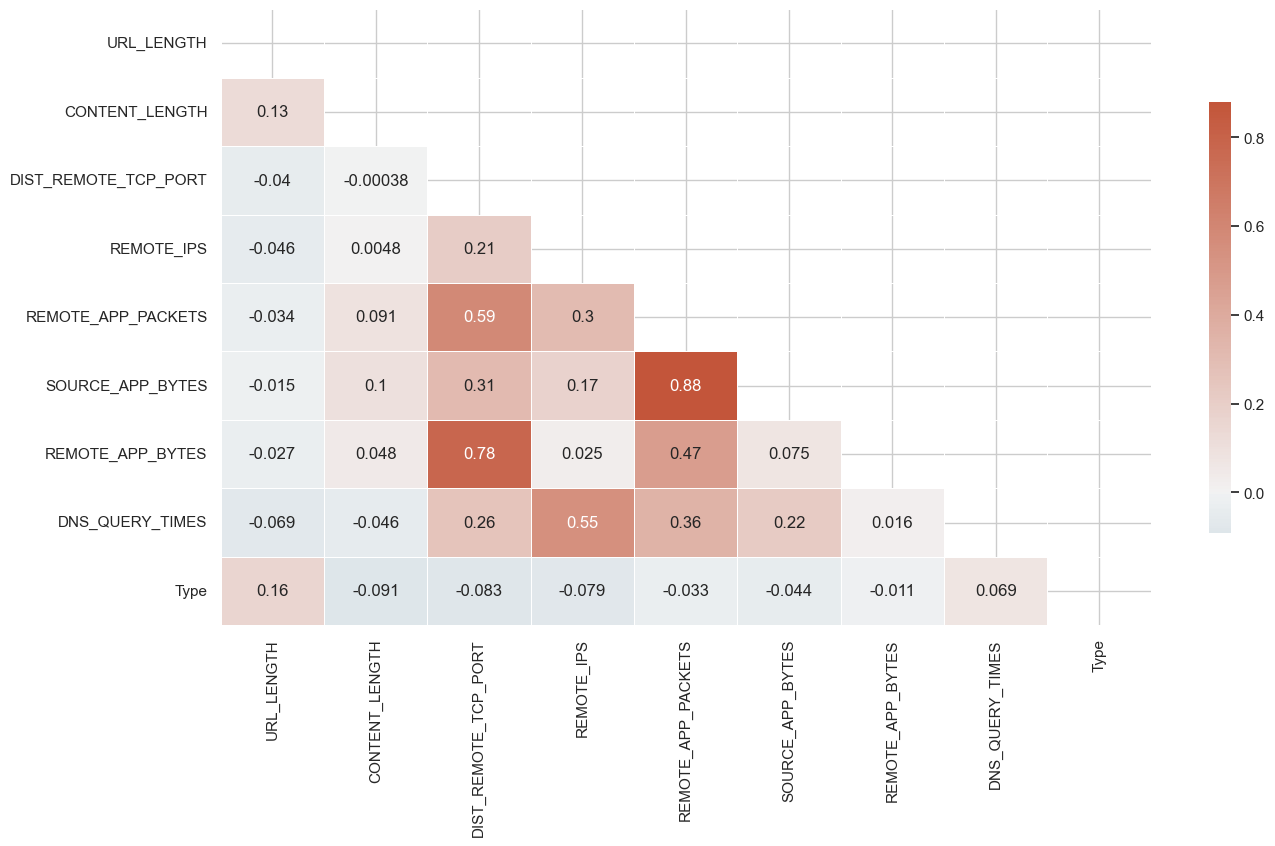

In [1337]:

chart_heatmap(correlation_matrix)

In [1338]:
websites = websites.drop(columns=["TCP_CONVERSATION_EXCHANGE","APP_PACKETS","APP_BYTES","SOURCE_APP_PACKETS","NUMBER_SPECIAL_CHARACTERS"])


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [1339]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1774 non-null   object 
 3   SERVER                1605 non-null   object 
 4   CONTENT_LENGTH        969 non-null    float64
 5   WHOIS_COUNTRY         1475 non-null   object 
 6   WHOIS_STATEPRO        1419 non-null   object 
 7   WHOIS_REGDATE         1654 non-null   object 
 8   WHOIS_UPDATED_DATE    1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 10  REMOTE_IPS            1781 non-null   int64  
 11  REMOTE_APP_PACKETS    1781 non-null   int64  
 12  SOURCE_APP_BYTES      1781 non-null   int64  
 13  REMOTE_APP_BYTES      1781 non-null   int64  
 14  DNS_QUERY_TIMES       1780 non-null   float64
 15  Type                 

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [1340]:
websites.drop(columns="CONTENT_LENGTH" ,inplace=True)
websites.dropna(subset=['WHOIS_STATEPRO'], axis=0, inplace=True)
websites.dropna(subset=['SERVER'], axis=0, inplace=True)
websites.dropna(subset=['CHARSET'], axis=0, inplace=True)
websites.dropna(subset=['WHOIS_REGDATE'], axis=0, inplace=True)
websites.dropna(subset=['DNS_QUERY_TIMES'], axis=0, inplace=True)



<div class="alert alert-success">
<li>There are 6 columns with null values </li>
<li> I've removed columns nulls following quantity of nulls</li>
</div>

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [1341]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   WHOIS_STATEPRO        1257 non-null   object 
 6   WHOIS_REGDATE         1257 non-null   object 
 7   WHOIS_UPDATED_DATE    1257 non-null   object 
 8   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 9   REMOTE_IPS            1257 non-null   int64  
 10  REMOTE_APP_PACKETS    1257 non-null   int64  
 11  SOURCE_APP_BYTES      1257 non-null   int64  
 12  REMOTE_APP_BYTES      1257 non-null   int64  
 13  DNS_QUERY_TIMES       1257 non-null   float64
 14  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), o

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [1342]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [1343]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace("[U'GB'; U'UK']", 'GB')


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [1344]:
websites.WHOIS_COUNTRY.value_counts()


WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     18
JP     10
IN      8
CN      8
CZ      8
RU      6
NL      5
CH      5
BS      4
AT      4
UK      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
TR      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
LV      1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [1345]:
top_10_countries = websites['WHOIS_COUNTRY'].value_counts().head(10).index
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

websites['WHOIS_COUNTRY'].value_counts()


WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     60
AU        26
PA        21
GB        18
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [1346]:
websites = websites.drop(columns=["WHOIS_STATEPRO","WHOIS_REGDATE","WHOIS_UPDATED_DATE"])
websites.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1257 non-null   object 
 1   URL_LENGTH            1257 non-null   int64  
 2   CHARSET               1257 non-null   object 
 3   SERVER                1257 non-null   object 
 4   WHOIS_COUNTRY         1257 non-null   object 
 5   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 6   REMOTE_IPS            1257 non-null   int64  
 7   REMOTE_APP_PACKETS    1257 non-null   int64  
 8   SOURCE_APP_BYTES      1257 non-null   int64  
 9   REMOTE_APP_BYTES      1257 non-null   int64  
 10  DNS_QUERY_TIMES       1257 non-null   float64
 11  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 127.7+ KB


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [1347]:
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
REMOTE_APP_PACKETS        int64
SOURCE_APP_BYTES          int64
REMOTE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [1348]:
websites = websites.drop(columns=["URL"])


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [1349]:
websites.CHARSET.value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [1350]:
l_server = ['Apache','Microsoft','nginx','codfw.wmnet']


for server in l_server:
    i_server = websites['SERVER'].str.contains(server,case = False,na=False)
    websites.loc[i_server, 'SERVER'] = server


In [1351]:
websites.SERVER.value_counts()

SERVER
Apache                         491
nginx                          323
Microsoft                      144
codfw.wmnet                     61
GSE                             49
Server                          48
YouTubeFrontEnd                 41
ATS                             30
Varnish                          7
LiteSpeed                        5
Jetty(9.0.z-SNAPSHOT)            4
ebay server                      4
Pizza/pepperoni                  3
DOSarrest                        3
openresty/1.11.2.1               3
openresty                        3
Squeegit/1.2.5 (3_sir)           2
squid/3.3.8                      2
Pagely Gateway/1.5.1             2
AmazonS3                         2
AkamaiGHost                      2
Roxen/5.4.98-r2                  2
ATS/5.3.0                        2
HTTPDaemon                       2
Play                             1
MI                               1
www.lexisnexis.com  9999         1
Application-Server               1
Cowboy       

![Think Hard](../think-hard.jpg)

In [1352]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [1353]:
topservers = websites['SERVER'].value_counts().head(3).index
websites['SERVER'] = websites['SERVER'].apply(lambda x: x if x in topservers else 'OTHER')

In [1354]:
websites.SERVER.value_counts()

SERVER
Apache       491
nginx        323
OTHER        299
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [1355]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1257 non-null   int64  
 1   CHARSET               1257 non-null   object 
 2   SERVER                1257 non-null   object 
 3   WHOIS_COUNTRY         1257 non-null   object 
 4   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 5   REMOTE_IPS            1257 non-null   int64  
 6   REMOTE_APP_PACKETS    1257 non-null   int64  
 7   SOURCE_APP_BYTES      1257 non-null   int64  
 8   REMOTE_APP_BYTES      1257 non-null   int64  
 9   DNS_QUERY_TIMES       1257 non-null   float64
 10  Type                  1257 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 117.8+ KB


In [1356]:
websites.SERVER.value_counts()

SERVER
Apache       491
nginx        323
OTHER        299
Microsoft    144
Name: count, dtype: int64

In [1357]:
website_dummy = pd.get_dummies(websites,drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [1358]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1257 non-null   int64  
 1   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 2   REMOTE_IPS            1257 non-null   int64  
 3   REMOTE_APP_PACKETS    1257 non-null   int64  
 4   SOURCE_APP_BYTES      1257 non-null   int64  
 5   REMOTE_APP_BYTES      1257 non-null   int64  
 6   DNS_QUERY_TIMES       1257 non-null   float64
 7   Type                  1257 non-null   int64  
 8   CHARSET_UTF-8         1257 non-null   bool   
 9   CHARSET_iso-8859-1    1257 non-null   bool   
 10  CHARSET_us-ascii      1257 non-null   bool   
 11  CHARSET_utf-8         1257 non-null   bool   
 12  CHARSET_windows-1251  1257 non-null   bool   
 13  CHARSET_windows-1252  1257 non-null   bool   
 14  SERVER_Microsoft      1257 non-null   bool   
 15  SERVER_OTHER          1257

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

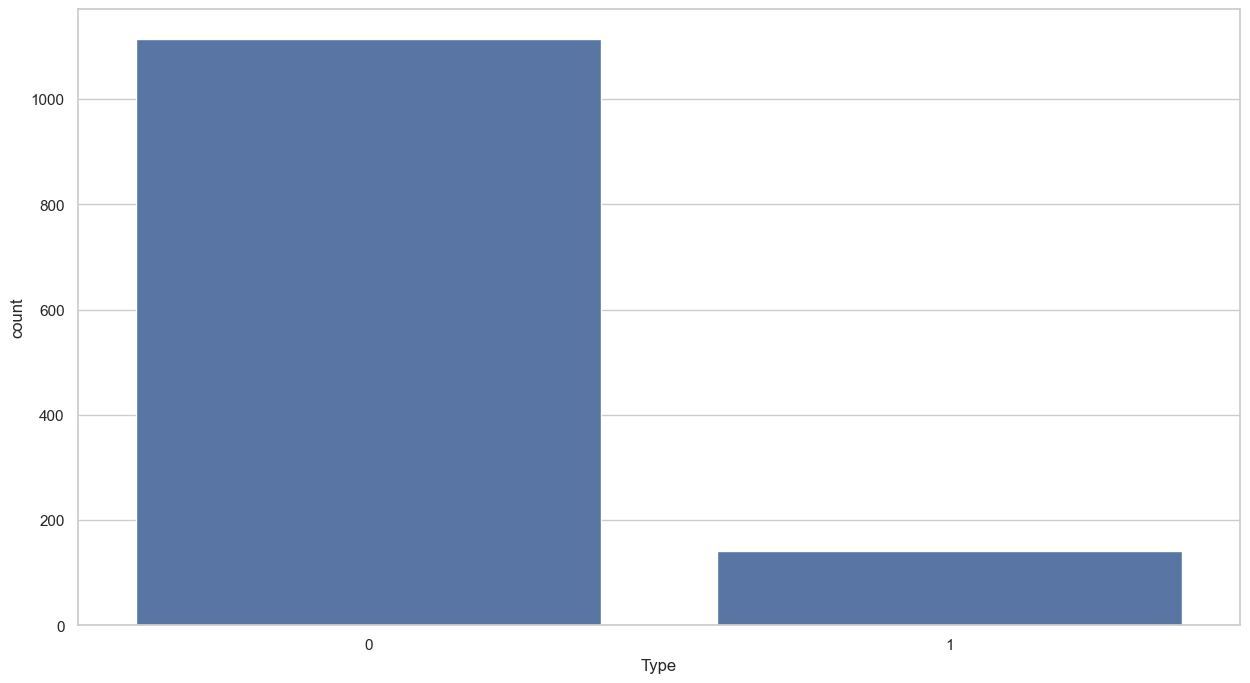

In [1359]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

sns.countplot(x=website_dummy.Type);

# Check if data is unbalanced. If so, go resampling



In [1360]:
X = website_dummy.drop("Type", axis=1)
y = website_dummy["Type"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# using SMOTE resampling to balance data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [1361]:
y_train.value_counts()

Type
0    904
1    101
Name: count, dtype: int64

In [1362]:
y_train_resampled.value_counts()
# After resampling with SMOTE we got same number of values, so our model is balanced.

Type
1    904
0    904
Name: count, dtype: int64

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [1363]:
lr = LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [1364]:
lr.fit(X_train_resampled_tomek, y_train_resampled_tomek)
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [1365]:

print(f"Confusion Matrix: {confusion_matrix( y_test,y_pred)}")

#print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Confusion Matrix: [[195  16]
 [  5  36]]


What are your thoughts on the performance of the model? Write your conclusions below.

<div class="alert alert-success">
<li>Accuracy is pretty high. It means that 89% of cases got right. </li>
<li> As I've balanced data resampling original dataset, I assume that 89% should be reliable.</li>
<li>Also, most of data is True Negative so we have a low percentage of malicious sites.</li>
</div>



#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [1366]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_resampled_tomek, y_train_resampled_tomek)





DecisionTreeClassifier(max_depth=3)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [1367]:
probabilities = model.predict_proba(X_test)[:, 1]
y_pred = np.where(probabilities > 0.5, 1, 0)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [1368]:
print(f"Confusion Matrix: {confusion_matrix( y_test,y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Confusion Matrix: [[180  31]
 [  0  41]]
Accuracy: 0.876984126984127
Precision: 0.5694444444444444
Recall: 1.0
F1 score: 0.7256637168141593


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [1369]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train_resampled_tomek, y_train_resampled_tomek)
probabilities = model.predict_proba(X_test)[:, 1]
y_pred = np.where(probabilities > 0.5, 1, 0)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [1370]:
print(f"Confusion Matrix: {confusion_matrix( y_test,y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Confusion Matrix: [[194  17]
 [  3  38]]
Accuracy: 0.9206349206349206
Precision: 0.6909090909090909
Recall: 0.926829268292683
F1 score: 0.7916666666666667


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

<div class="alert alert-success">
<p>Increasing the depth allowed the model to make more complex splits, so it means better separation of the classes. As result of this,  the number of false positives (from 31 to 17) decrease and a better true positive and true negative count.</p>
<p> As conclusion we can say that this model instanced with max_Dept=5 improves all indicators</p>
</div>



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [1378]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X_train_sc  = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

model = LogisticRegression()
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)

accuracy_sc = accuracy_score(y_test, y_pred)
print("Accuracy with RobustScaler:", accuracy_sc)

Accuracy with RobustScaler: 0.9126984126984127


<div class="alert alert-success">
<p>With this model, accuracy has increased regarding last results. It seems that this model can work better than previous, obtaining similar results than DecisionTree Classifier (0.92)</p>
</div>

